# Formulation of the HFMDCVRP (Multi Depot Heterogeneous Fleet CVRP)

Packages importation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from gurobipy import *
import pandas as pd

Data importation:

In [2]:
cmoto = np.loadtxt("distmoto.txt")
cvan = np.loadtxt("distvan.txt")
ccamion = np.loadtxt("distcamion.txt")

In [3]:
# Number of vehicles
Vehic = 6

# Number of clients
Clients = 12

# Big M
M = 100

# Number of depots
Depots = 2

Sets

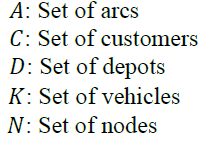

In [4]:
N = [i for i in range(Clients+Depots)] # Set of nodes
C = [i for i in range(Depots,Clients+Depots)]
A = [(i,j) for i in N for j in N]
K = [i for i in range(Vehic)]
D = [i for i in range(Depots)]

Getting the demand of every customer:

In [5]:
demand = np.loadtxt("demand.txt")
d = {i: demand[i] for i in C}

Capacity of each depot

In [18]:
R = [4,3]

Setting the distance matrix for every vehicle:

In [6]:
c = np.zeros([Clients+Depots,Clients+Depots,Vehic])
c[:,:,0]=cmoto
c[:,:,1]=cmoto
c[:,:,2]=cvan
c[:,:,3]=cvan
c[:,:,4]=ccamion
c[:,:,5]=ccamion

Final parameter, the capacity of each vehicle

In [7]:
capacidad = np.loadtxt("cap.txt")
q = {i: capacidad[i] for i in K}

In [8]:
# Call the model
m = Model("HFMDVRP")
m.setParam("TimeLimit",60)

Academic license - for non-commercial use only - expires 2021-04-09
Using license file C:\Users\57316\gurobi.lic
Changed value of parameter TimeLimit to 60.0
   Prev: inf  Min: 0.0  Max: inf  Default: inf


Variables:

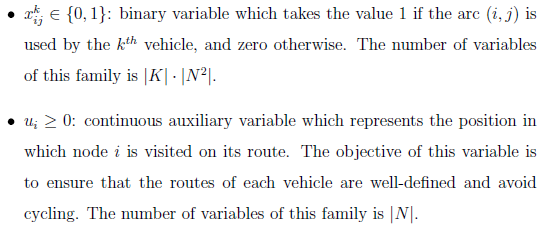
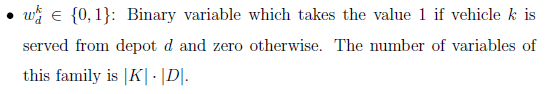

In [9]:
x = m.addVars(A,K,vtype=GRB.BINARY,name="x")
u = m.addVars(N, vtype=GRB.CONTINUOUS,lb=0,ub=Clients+1,name="u")
w = m.addVars(D,K, vtype=GRB.BINARY,name="w")

Objective function

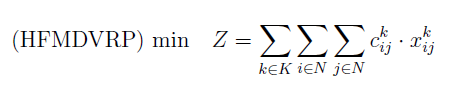

In [11]:
m.modelSense = GRB.MINIMIZE
m.setObjective(quicksum(c[i,j,k]*x[i,j,k] for i,j in A for k in K))

# Constraints

Every client must be visited once

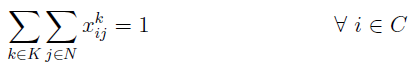

In [14]:
m.addConstrs(quicksum(x[i,j,k] for k in K for j in N)==1 for i in C);

The demand served by a vehicle must be less than its capacity

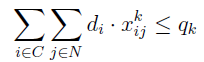

In [15]:
m.addConstrs(quicksum(d[i]*x[i,j,k] for i in C for j in N)<=q[k] for k in K);

Vehicles must start the route at the depot assigned to it

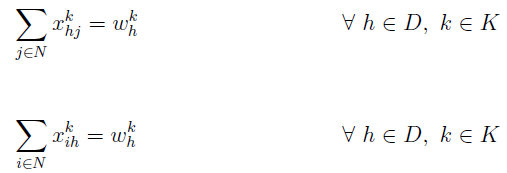

In [16]:
m.addConstrs(quicksum(x[h,j,k] for j in N)==w[h,k] for k in K for h in D);
m.addConstrs(quicksum(x[i,h,k] for i in N)==w[h,k] for k in K for h in D);

Flow constraint

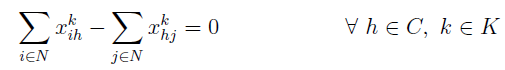

In [17]:
m.addConstrs(quicksum(x[i,h,k] for i in N)-quicksum(x[h,j,k] for j in N)==0 for k in K for h in C);

Depot capacity

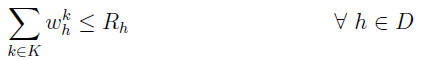

In [20]:
m.addConstrs(quicksum(w[h,k] for k in K)<= R[h] for h in D);

Subcircuit elimination

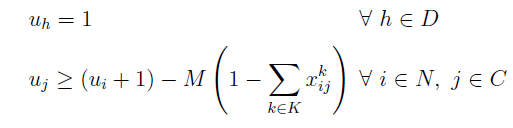

In [22]:
m.addConstrs(u[h]==1 for h in D);
m.addConstrs(u[j]>=(u[i]+1)-M*(1-quicksum(x[i,j,k] for k in K)) for i in N for j in C);

In [23]:
m.optimize()

Gurobi Optimizer version 9.1.1 build v9.1.1rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 288 rows, 1202 columns and 5594 nonzeros
Model fingerprint: 0xc6502756
Variable types: 14 continuous, 1188 integer (1188 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+02]
  Objective range  [8e+00, 3e+03]
  Bounds range     [1e+00, 1e+01]
  RHS range        [1e+00, 1e+02]
Presolve removed 16 rows and 94 columns
Presolve time: 0.04s
Presolved: 272 rows, 1108 columns, 5276 nonzeros
Variable types: 12 continuous, 1096 integer (1096 binary)

Root relaxation: objective 1.755687e+03, 296 iterations, 0.01 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0 1755.68696    0   30          - 1755.68696      -     -    0s
H    0     0                    21152.010000 1755.68696  91.7%     -    0s
H    0     0     

In [24]:
m.printAttr("X")


    Variable            X 
-------------------------
    x[0,4,4]     0.999999 
   x[0,11,3]            1 
   x[1,10,1]            1 
    x[2,6,4]            1 
    x[3,2,4]            1 
    x[4,3,4]            1 
    x[5,7,3]            1 
    x[6,8,4]            1 
    x[7,0,3]            1 
    x[8,0,4]     0.999999 
    x[9,5,3]            1 
  x[10,13,1]            1 
   x[11,9,3]            1 
   x[12,1,1]            1 
  x[13,12,1]            1 
        u[0]            1 
        u[1]            1 
        u[2]            4 
        u[3]            3 
        u[4]            2 
        u[5]           12 
        u[6]           12 
        u[7]           13 
        u[8]           13 
        u[9]            3 
       u[10]            2 
       u[11]            2 
       u[12]           13 
       u[13]            3 
      w[0,3]            1 
      w[0,4]     0.999999 
      w[1,1]            1 
